In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'   Dataff.pdf	 PS_20174392719_1491204439457_log.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#checking Missing values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
#checking proportion of fraud vs non-fraud
df['isFraud'].value_counts(normalize=True) * 100

,proportion
isFraud,
0,99.870918
1,0.129082


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Encode type column
#Labelencoder converts Categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the 'type' column
#This line does two things at once:

#le.fit(df['type']) learns all the unique values in the type column (like 'TRANSFER', 'CASH_OUT', etc.).

#le.transform(df['type']) replaces each value with its corresponding number.
df['type'] = le.fit_transform(df['type'])

# Check mapping
#This creates a dictionary that maps original labels to numbers:

#le.classes_: list of original string labels.

#le.transform(le.classes_): gives the numeric encoding for each of those labels.

#zip(...): pairs each label with its corresponding number.

#dict(...): converts those pairs into a dictionary.
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_mapping)


Label Encoding Mapping: {'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#dropping unnecessary ID columns
df.drop(columns=['nameOrig','nameDest'],inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
#seperating features and Target
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [ ]:
#SMOTENC needs to know which columns are categorical
# Find index of the 'type' column
categorical_features = [x.columns.get_loc('type')]
print("Categorical column index:", categorical_features)


Categorical column index: [1]


/tmp/ipython-input-2430431986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['skyblue', 'salmon'])
/tmp/ipython-input-2430431986.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['skyblue', 'salmon'])


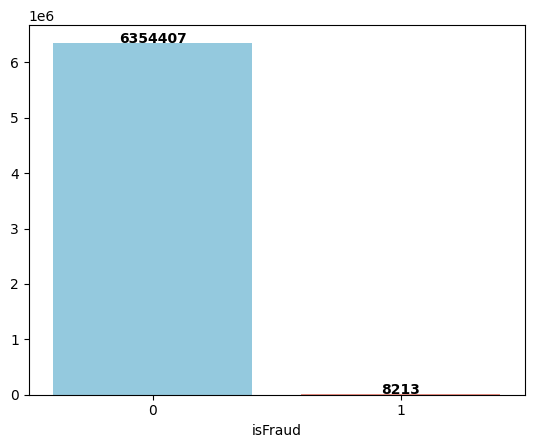

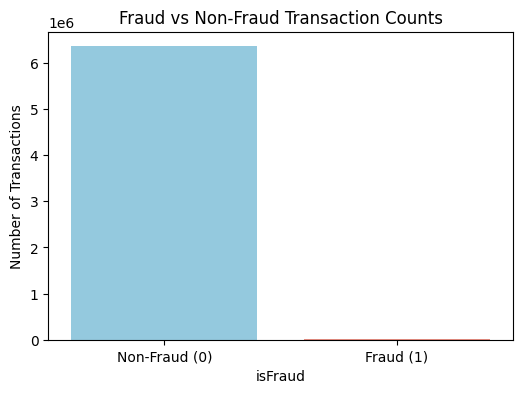

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values of isFraud
fraud_counts = df['isFraud'].value_counts()
ax=sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['skyblue', 'salmon'])
# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('Fraud vs Non-Fraud Transaction Counts')
#adding values on top
for i, v in enumerate(fraud_counts.values):
    ax.text(i, v + 200, str(v), ha='center', color='black', fontweight='bold')
plt.show()


In [ ]:
#applying SMOTENC
from imblearn.over_sampling import SMOTENC
import numpy as np
from collections import Counter

# Step 1: Calculate how many total samples we want after resampling
desired_total = len(y)  # Start with same number of samples
#defining desired fraud ratio
desired_fraud_ratio = 0.30#I want my final dataset to have 30% fraud cases

#  Step 2: Calculate how many fraud cases are needed

n_total_desired = y.value_counts()[0] / (1 - desired_fraud_ratio)
n_fraud_desired = int(n_total_desired * desired_fraud_ratio)#we're asking SMOTENC to create synthetic samples so that class 1 (fraud) is  30% of the dataset.

print("Target fraud count:", n_fraud_desired)

# Step 3: Apply SMOTENC with sampling_strategy
categorical_features = [x.columns.get_loc('type')]#SMOTENC needs to know which columns are categorical, so it doesn't create fake numbers for them.

#This line gives it the column index of the 'type' column in X.

sm = SMOTENC(categorical_features=categorical_features,
             sampling_strategy={1: n_fraud_desired},
             random_state=42,
             )#You're creating a SMOTENC object.

#sampling_strategy={1: n_fraud_desired} tells it exactly how many fraud cases (class 1) to generate.

x_resampled, y_resampled = sm.fit_resample(x, y)#x_resampled and y_resampled are  balanced feature and label sets.

# Step 4: Check the new class distribution
print("After resampling:", Counter(y_resampled))



Target fraud count: 2723317
After resampling: Counter({0: 6354407, 1: 2723317})


In [ ]:
x_resampled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
#dropping Step
df_resampled = x_resampled.copy()
df_resampled['isFraud'] = y_resampled  # Add target back

# Drop ID-like columns
df_resampled.drop(['step'], axis=1, inplace=True)

/tmp/ipython-input-2892569915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_resampled, x='isFraud', palette='Set1')


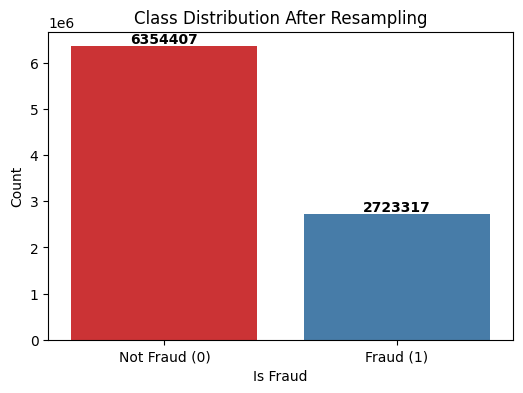

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_resampled, x='isFraud', palette='Set1')
plt.title('Class Distribution After Resampling')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'])

# Add value labels on top of the bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., p.get_height()), # Corrected line
                ha='center', va='bottom', color='black', fontweight='bold') # Added va='bottom' for better positioning
plt.show()

In [ ]:
# Step 1: Randomly sample 300,000 rows from your resampled dataset
df_resampled_sample = df_resampled.sample(n=300000, random_state=42)#.sample(n=300000)	Randomly selects 3 lakh (300,000) rows from the dataset.
#This reduces the dataset size for memory efficiency without bias (because it's random).


# Step 2: Split features and target
X_final_sample = df_resampled_sample.drop('isFraud', axis=1)
y_final_sample = df_resampled_sample['isFraud']#X_final_sample → all input features

#y_final_sample → 0 or 1 indicating fraud status


# Step 3: Train-validation-test split (80-10-10)
from sklearn.model_selection import train_test_split

# First split (train 80%, temp 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_final_sample, y_final_sample, test_size=0.2, random_state=42, stratify=y_final_sample
)
#test_size=0.2	20% goes into a temporary set (val + test)
#stratify=y_final_sample	Ensures the class distribution (fraud/non-fraud) stays the same in train/temp
#Output:	X_train: 80%, X_temp: 20%

# Then split temp into validation and test (10% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [ ]:
X_test.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
1071631,1,2.681272e+05,70.000000,0.00,2.047490e+06,2.315618e+06,0
81501,3,8.157970e+03,0.000000,0.00,0.000000e+00,0.000000e+00,0
6784951,4,2.685390e+05,268538.991766,0.00,0.000000e+00,0.000000e+00,0
1787248,3,7.062600e+02,305656.000000,304949.74,0.000000e+00,0.000000e+00,0
7071925,4,1.897850e+06,0.000000,0.00,1.215187e+06,3.113037e+06,0


In [ ]:
# One-hot encode the 'type' column after splitting
#pd.get_dummies()	Converts the 'type' column into multiple 0/1 columns.
#drop_first=True	Drops the first category to avoid multicollinearity (this is good practice when using models like logistic regression).
X_train = pd.get_dummies(X_train, columns=['type'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['type'], drop_first=True)
## Step 2: Align columns in val and test sets to match training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [1]:
#feature Scaling
#I'm  using StandardScaler to normalize your feature data so that:

#All numeric features have mean = 0 and standard deviation = 1.

#This helps models converge faster, and prevents features with larger scales (like amount) from dominating smaller features.
from sklearn.preprocessing import StandardScaler#standardize  numerical features by removing the mean and scaling to unit variance.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)#X_train_scaled contains normalized feature values, ready for modeling
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV#GridSearchCV: for hyperparameter tuning

#metrics: tools to evaluate model performance


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Step 2: Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)#solver='liblinear' is good for small-to-medium datasets and supports L1 & L2 penalties.

# Step 3: Set up the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],        # Try only 3 values
    'penalty': ['l2']         # Use only L2 (more stable & works with all solvers)
}

#C controls regularization (smaller C = more regularization).

#Trying both L1 and L2 penalty types to see which gives best result.
# Step 4: Create GridSearchCV
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           scoring='roc_auc',     # Use ROC AUC for scoring
                           cv=3,                  # 5-fold cross-validation
                           n_jobs=-1,             # Use all cores
                           verbose=1)             # Show progress
#Tries all combinations of C and penalty using 5-fold cross-validation.

#Uses ROC AUC to evaluate performance on each fold.

#n_jobs=-1 = use all CPU cores for faster training.

# Step 5: Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)
#Actually runs the grid search across all hyperparameter combinations on the training data.

#After completion, it stores the best model found
# Step 6: View the best parameters
print("Best Parameters:", grid_search.best_params_)#Tells you which combination of C and penalty gave the best ROC AUC score.
# Step 7: Use the best model to make predictions
best_model = grid_search.best_estimator_

y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

y_val_proba = best_model.predict_proba(X_val_scaled)[:, 1]
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
#Predicts labels (0 or 1) for validation/test sets.

#Also gets predicted probabilities (needed for ROC AUC).
# Step 8: Evaluate the model on validation and test sets
print("Validation Metrics:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_proba))

print("\nTest Metrics:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_proba))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 10, 'penalty': 'l2'}
Validation Metrics:
[[20538   483]
 [  714  8265]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     21021
           1       0.94      0.92      0.93      8979

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000

ROC AUC: 0.9936394568154389

Test Metrics:
[[20517   504]
 [  732  8247]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     21021
           1       0.94      0.92      0.93      8979

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000

ROC AUC: 0.9941095503121183


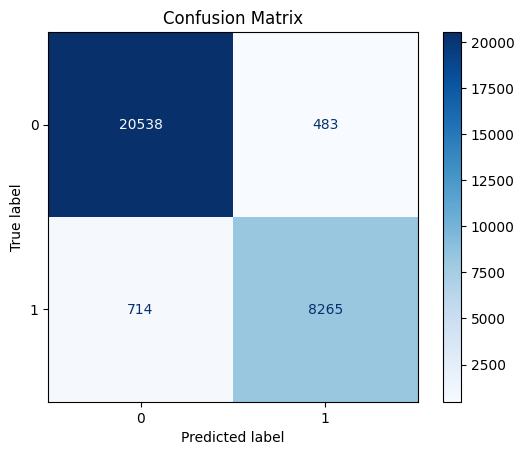

In [ ]:
#generating confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


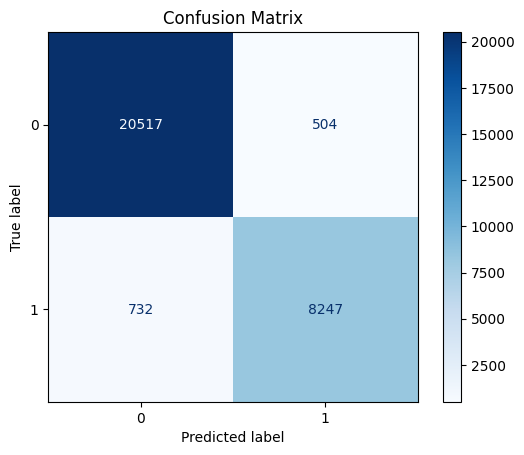

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Best Parameters: {'svm__C': 10}

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     21021
           1       0.94      0.88      0.91      8979

    accuracy                           0.95     30000
   macro avg       0.95      0.93      0.94     30000
weighted avg       0.95      0.95      0.95     30000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21021
           1       0.94      0.88      0.91      8979

    accuracy                           0.95     30000
   macro avg       0.94      0.93      0.93     30000
weighted avg       0.95      0.95      0.95     30000



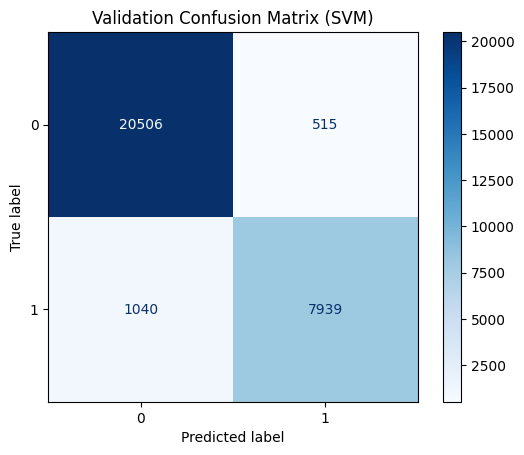

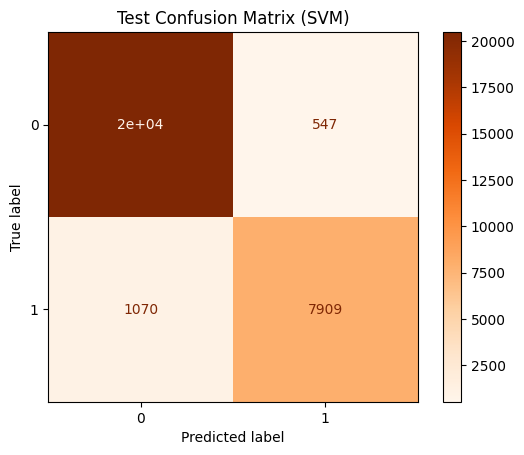

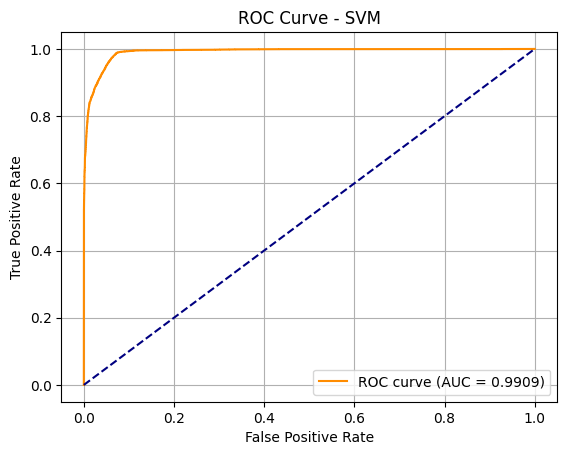

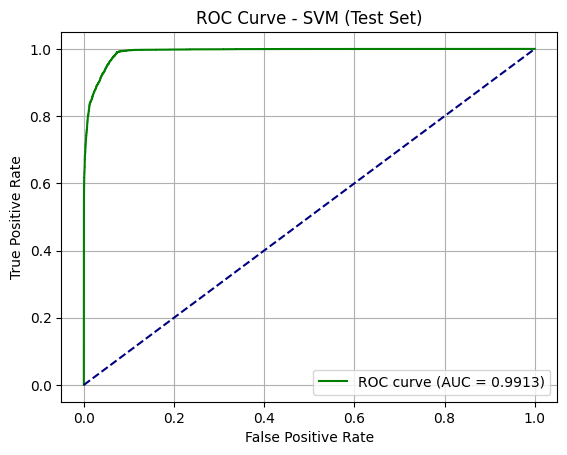

In [ ]:
#SVM with GridSearch
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Create a pipeline (for scaling + model)
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(dual=False, max_iter=10000, random_state=42))
])

# Step 2: Define a light parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10]  # Small search space to avoid long runtime
}

# Step 3: Use GridSearchCV with 3-fold CV
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Step 4: Get predictions
y_val_pred = grid.predict(X_val_scaled)
y_test_pred = grid.predict(X_test_scaled)

# Step 5: Evaluation
print("Best Parameters:", grid.best_params_)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Validation Confusion Matrix (SVM)")
plt.show()
# Test Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap=plt.cm.Oranges)
plt.title("Test Confusion Matrix (SVM)")
plt.show()


# ROC AUC Score and Curve
# Note: LinearSVC doesn't support `predict_proba`, so we use decision_function
y_val_scores = grid.decision_function(X_val_scaled)
fpr, tpr, _ = roc_curve(y_val, y_val_scores)
roc_auc = roc_auc_score(y_val, y_val_scores)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
# ROC Curve - Test Set
y_test_scores = grid.decision_function(X_test_scaled)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)
roc_auc_test = roc_auc_score(y_test, y_test_scores)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f"ROC curve (AUC = {roc_auc_test:.4f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Test Set)")
plt.legend()
plt.grid()
plt.show()


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:28:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Validation Confusion Matrix:
[[20897   124]
 [   25  8954]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     21021
           1       0.99      1.00      0.99      8979

    accuracy                           1.00     30000
   macro avg       0.99      1.00      0.99     30000
weighted avg       1.00      1.00      1.00     30000

Validation ROC AUC Score: 0.9996326839914258
Test Confusion Matrix:
[[20881   140]
 [   30  8949]]
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     21021
           1       0.98      1.00      0.99      8979

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000

Test ROC AUC Score: 0.999603404142567


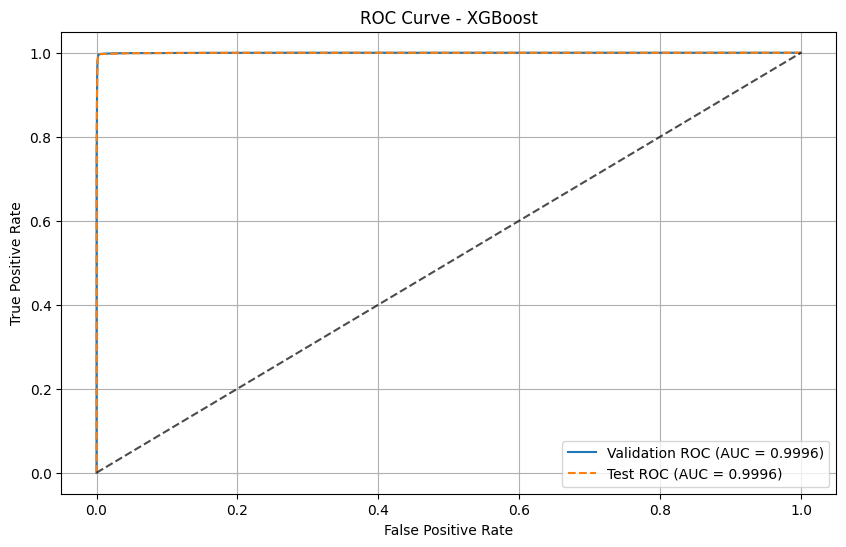

In [ ]:
# Step 1: Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Light grid to avoid memory issues
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1]
}

# Setup GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1  # Use all available CPUs
)

# Fit to training data
grid.fit(X_train_scaled, y_train)

# Best model
best_xgb = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict
y_val_pred = best_xgb.predict(X_val_scaled)
y_val_prob = best_xgb.predict_proba(X_val_scaled)[:, 1]

# Confusion Matrix
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Classification Report
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# ROC AUC
roc_auc_val = roc_auc_score(y_val, y_val_prob)
print("Validation ROC AUC Score:", roc_auc_val)

# Predict
y_test_pred = best_xgb.predict(X_test_scaled)
y_test_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Classification Report
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# ROC AUC
roc_auc_test = roc_auc_score(y_test, y_test_prob)
print("Test ROC AUC Score:", roc_auc_test)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {roc_auc_val:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.4f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid()
plt.show()







Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Validation Confusion Matrix:
[[20970    51]
 [   18  8961]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21021
           1       0.99      1.00      1.00      8979

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Validation ROC AUC Score: 0.9998928489454

Test Confusion Matrix:
[[20966    55]
 [   25  8954]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21021
           1       0.99      1.00      1.00      8979

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.0

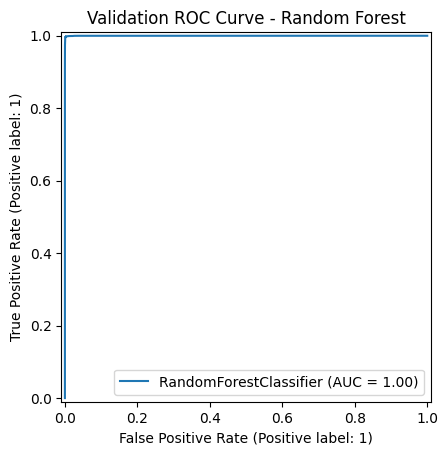

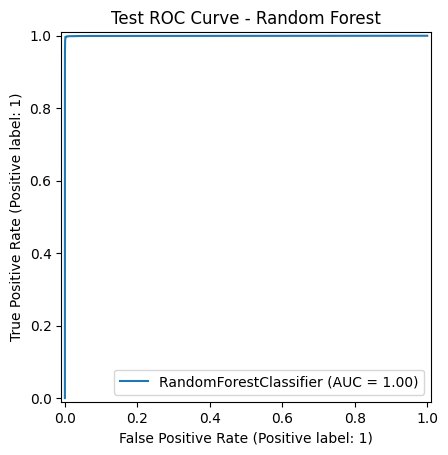

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Define model
rfc = RandomForestClassifier(random_state=42)

# **Much smaller grid** – fewer combinations
param_grid = {
    'n_estimators': [100],           # just one value
    'max_depth': [10, None],         # try shallow and unlimited
    'min_samples_split': [2]         # default
}

# Simplified Grid Search: fewer folds and no parallel jobs
grid_rfc = GridSearchCV(rfc, param_grid, cv=2, scoring='roc_auc', verbose=1, n_jobs=1)
grid_rfc.fit(X_train_scaled, y_train)

# Best model
best_rfc = grid_rfc.best_estimator_
print("Best parameters found:", grid_rfc.best_params_)

# Predict
y_val_pred_rfc = best_rfc.predict(X_val_scaled)
y_test_pred_rfc = best_rfc.predict(X_test_scaled)

# Evaluation - Validation
print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rfc))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_rfc))

val_auc = roc_auc_score(y_val, best_rfc.predict_proba(X_val_scaled)[:, 1])
print("Validation ROC AUC Score:", val_auc)

# Evaluation - Test
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rfc))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_rfc))

test_auc = roc_auc_score(y_test, best_rfc.predict_proba(X_test_scaled)[:, 1])
print("Test ROC AUC Score:", test_auc)

# Plot ROC
RocCurveDisplay.from_estimator(best_rfc, X_val_scaled, y_val)
plt.title("Validation ROC Curve - Random Forest")
plt.show()

RocCurveDisplay.from_estimator(best_rfc, X_test_scaled, y_test)
plt.title("Test ROC Curve - Random Forest")
plt.show()


/tmp/ipython-input-4002699197.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


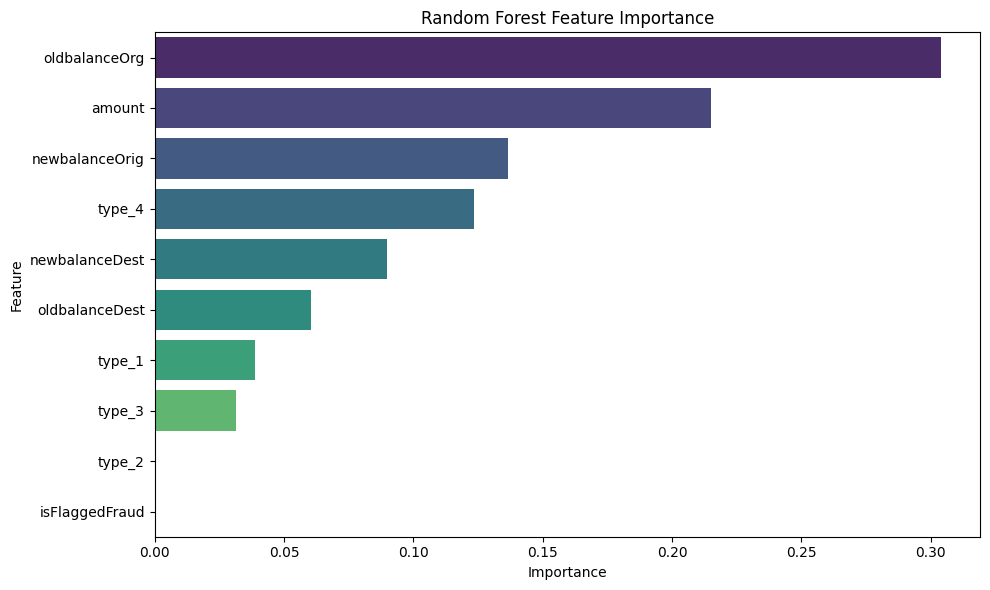

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rfc.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
